# 03.01 interpolation: interpolating functions

##### code, support for section text

In [ ]:
if False: # settings for sensei
  from google.colab import auth
  from googleapiclient.discovery import build

  auth.authenticate_user()
  about = build('drive','v3').about().get(fields='user').execute()
  if about['user']['displayName'] == "Sun K.":

    # output to pdf setting
    from google.colab import output
    output.no_vertical_scroll()
    #output.no_horizontal_scroll() # sigh, doesnt exist

In [ ]:
if True: # settings for the people
  import matplotlib.pyplot as plt
  import numpy as np
  import numpy.polynomial as npp
  import scipy as sp
  from tabulate import tabulate


###### code, utility

In [ ]:
def lazy_spacer(xs,col=0,margin=1,h=0.1):
  """
  xs     : array
  col    : column to space
  margin : how much to extend min,max of column interval
  h      : stepsize per column unit

  returns : 1d array containing evenly spaced points beyond, including column
  """
  rc = None

  try:
    x_from = min(xs[:,col]) - margin
    x_thru = max(xs[:,col]) + margin
    x_many = int((x_thru - x_from)/h + 1)

    rc = np.linspace(x_from,x_thru,x_many)
  except:
    print("misfortune cookie: make better choices in your life")

  return rc


In [ ]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html

def divided_diff(x, y):
  '''
  function to calculate the divided
  differences table
  '''
  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef


In [ ]:
def newton_poly(coef, x_data, x):
  '''
  evaluate the newton polynomial
  at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p


###### code, images in order of appearance

In [ ]:
def img_parabolic():
  # known
  input = np.array([[0,1],[2,2],[3,4]])
  p = lambda x: pow(x,2)/2 - x/2 + 1

  # calc
  xs = lazy_spacer(input)
  ps = p(xs)

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.scatter(input[:,0],input[:,1],c="C0",marker="o",label="some data")
  plt.plot(xs,ps,c="C1",linestyle=":",label="$P_2(x) = \\frac{x^2}{2} - \\frac{x}{2} + 1$")

  # plot, style
  plt.grid()
  plt.title("parabolic fit to some data\n")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylabel("why, i ask you")
  plt.xlabel("x")
  # plot, show
  plt.show()


###### code, examples

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html

def eg_02():
  # known
  input = np.array([[0,2],[1,1],[2,0],[3,-1]])
  p = lambda x: -x + 2

  # calc
  xs = input[:,0]
  ps = p(xs)

  # library life
  polysci = sp.interpolate.lagrange(input[:,0],input[:,1])

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.scatter(input[:,0],input[:,1],c="C0",marker="o",label="some data")
  plt.plot(xs,ps,c="C1",linestyle=":",label="$P_1(x) = 2 - x$")
  plt.plot(xs,npp.Polynomial(polysci.coef[::-1])(xs),c="C2",linestyle=":",label='poly, sci')

  # plot, style
  plt.grid()
  plt.title("lagrange munges some data\n")
  plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
  plt.ylabel("wait, was i trolled?")
  plt.xlabel("x")
  # plot, show
  plt.show()

  print(f"\nas object:\n{polysci}")
  print(f"\nas array of coeffs:\n{npp.Polynomial(polysci.coef[::-1]).coef}")


In [ ]:
def eg_04():
  xs = np.array([0,2,3,1])
  ys = np.array([1,2,4,0])
  # get the divided difference coef
  as_tres = divided_diff(xs[0:3],ys[0:3])[0,:]
  as_four = divided_diff(xs,ys)[0,:]

  # evaluate on new data points
  xs_moar = np.arange(-1,4,.1)
  ys_tres = newton_poly(as_tres,xs[0:3],xs_moar)
  ys_four = newton_poly(as_four,xs,xs_moar)

  # plot, cfg
  plt.close("all")

  # plot
  plt.plot(xs[0:3],ys[0:3],'bo')
  plt.plot(xs_moar,ys_tres,color="blue",label="n=3")
  plt.plot(xs[3],ys[3],'ro')
  plt.plot(xs_moar,ys_four,color="red",label="n=4")

  # plot, style
  plt.title(f"P(x) = N(x)\n")
  # plot, show
  plt.show()


In [ ]:
def eg_05():
  xs = np.array([0,1,2,3])
  ys = np.array([2,1,0,-1])
  # get the divided difference coef
  as_four = divided_diff(xs,ys)[0,:]

  # evaluate on new data points
  xs_moar = np.arange(-1,4,.1)
  ys_four = newton_poly(as_four,xs,xs_moar)

  # plot, cfg
  plt.close("all")

  # plot
  plt.plot(xs,ys,marker="o")
  plt.plot(xs_moar,ys_four,label="NDD")

  # plot, style
  plt.title(f"P(x) = N(x)\n")
  # plot, show
  plt.show()


In [ ]:
def eg_07():

  p = lambda x: x*(0.9549 + (x - np.pi/6)*(-0.2443 + (x - np.pi/3)*(-0.1139)))

  # known
  xs = np.linspace(0,np.pi/2,3+1)

  # calc
  ps = p(xs)
  xs_more = np.linspace(-np.pi*3/4,np.pi*3/4,1000) # 3*8+1)
  ps_more = p(xs_more)
  ys_more = np.sin(xs_more)

  if True: # plot approximte
    # plot, cfg
    plt.close("all")

    # plot, data
    plt.scatter(xs,ps,c="C0",marker="o",label="some data")
    plt.plot(xs_more,ys_more,c="C1",linestyle=":",label="np.sin()")
    plt.plot(xs_more,ps_more,c="C2",linestyle=":",label="$P_3(x) = N_3(x)$")

    # plot, style
    plt.grid()
    plt.title("approximating sine\n")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.ylabel("y")
    plt.xlabel("x")
    # plot, show
    plt.show()

  if True: # table error
    # error, sample
    xs_sam = np.array([1.,2.,3.,4.,14.,1000.])
    ys_sam = np.sin(xs_sam)

    # error, scale input to area of niceness
    xs_mod = xs_sam.copy()
    ps_sam = np.zeros_like(ys_sam)
    for i,x in enumerate(xs_mod):
      s = 1.
      x = x%(2*np.pi)
      if x > np.pi:
        x = 2*np.pi - x
        s = -1.
      if x > np.pi/2:
        x = np.pi - x
      xs_mod[i] = x
      ps_sam[i] = s*p(x) # point-by-point value of approximation

    # error, display
    data = []
    for i,x in enumerate(xs_sam):
      data.append([x,ys_sam[i],ps_sam[i],abs(ys_sam[i] - ps_sam[i])])

    print() #spacer
    print(tabulate(data,headers=["x (rad)","np.sin()","$N_3,mod$","error"],tablefmt="github"),"\n")


## 0 interpolation

efficient ways of representing data are fundamental to science and engineering wrt understanding and application. at its most fundamental, approximating data with a polynomial is an act of compression - ie, function $\hat{y}(x)$ takes the place of experimental measurements $\{x_i,y_i\}$ sufficiently to facilitate design.

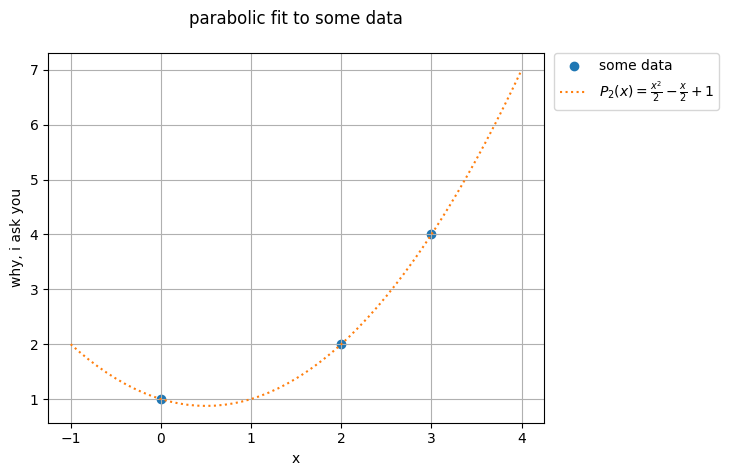

In [ ]:
img_parabolic()

<b><font color=grey>definition 01</font></b> function $y=P(x)$ <b>interpolates</b> data points $(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)$ if $p(x_i) = y_i$ for each $1\le i\le n$.

$P$ must be a function. ie, that each $x$ corresponds to one $y$. this restricts interpolation of set $\{(x_i,y_i)\}$ in that each $x_i$ must be distinct for a function to pass through them; there is no such restriction on $y_i$.

wrt interpolation methods, obviously (= first) consider polynomials. q: does a polynomial fit always exist? a: if $x_i$ are distinct then some polynomial $y = P(x)$ runs through them.

also, interpolation is the reverse of evaluation. ie, polynomial evaluation calculates $y_i$ given $x_i$; polynomial interpolation computes a polynomial from points $(x_i,y_i)$.

## 1 lagrange interpolation

for an interpolating polynomial, given $n$ data points $(x_1,y_1),\dots,(x_n,y_n)$, lagrange is a method of explicit formula of degree $d = n-1$. eg, for three points $(x_1,y_1),(x_2,y_2),(x_3,y_3)$,

$$P_2(x) = y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)} + y_2\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)} + y_3\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}.$$

is the <b>lagrange interpolating polynomial</b> for these points. note that

\begin{align}
  x_1 \mapsto x : P_2(x_1) &= y_1 + 0 + 0 = y_1 \\
  x_2 \mapsto x : P_2(x_2) &= 0 + y_2 + 0 = y_2 \\
  x_3 \mapsto x : P_2(x_3) &= 0 + 0 + y_3 = y_3.
\end{align}

##### <b><font color=grey>example 01</font></b>

find interpolating polynomial for data points $(0,1),(2,2),(3,4)$.

\begin{align}
  P_2(x) &= 1\cdot\frac{(x-2)(x-3)}{(0-2)(0-3)} + 2\cdot\frac{(x-0)(x-3)}{(2-0)(0-3)} + 4\cdot\frac{(x-0)(x-2)}{(3-0)(3-2)} \\ \\
  &= \frac{1}{6}(x^2-5x+6) + 2(-\frac{1}{2})(x^2-3x) + 4(\frac{1}{3})(x^2-2x) \\ \\
  &= \frac{1}{2}x^2 - \frac{1}{2}x + 1. \\ \\
  &\Rightarrow \quad P_2(0)=1,P_2(2)=2,P_2(3)=4. \quad\checkmark
\end{align}

##### usw

for $n$ points $(x_1,y_1),\dots,(x_n,y_n)$, for each $k$ between $1$ and $n$, define degree $d=n-1$ polynomial

$$L_k(x) = \frac{(x-x_1)\dots(x-x_{k-1})(x-x_{k+1})\dots(x-x_n)}{(x_k-x_1)\dots(x_k-x_{k-1})(x_k-x_{k+1})\dots(x_k-x_n)}.$$

as seen for $n=3$, generally $L_k(x_k) = 1,L_k(x_{j\ne k})=0$. then

$$P_{d\le n-1}(x_k) = y_1L_1(x_k) + \dots + y_nL_n(x_k) = 0 + \dots + 0 + y_kL_k(x_k) + 0 + \dots + 0 = y_k,$$

a polynomial of degree at most $n-1$ that passes through any set of $n$ points with distinct $x_i$s -- and it is the only one. she said, as if picking a fight.

##### <b><font color=grey>theorem 02</font></b> <b>main theorem of polynomial interpolation</b>

let $(x_1,y_1),\dots,(x_n,y_n)$ be $n$ points in the plane with distinct $x_i$. then there exists one and only one polynomial $P$ of degree $n-1$ or less that satisfies $P(x_i) = y_i, i = 1,
\dots,n$.

###### <b><font color=grey>proof</font></b>

the existence is proved by the explicit formula for lagrange interpolation. to show there is only one, assume that there are two, $P(x)$ and $Q(x)$ that have degree at most $n-1$ and that both interpolate all $n$ points. ie, $P(x_1) = Q(x_1) = y_1$, $P(x_2) = Q(x_2) = y_2$, $\dots$, $P(x_n) = Q(x_n) = y_n$. define polynomial $H(x) = P(x) - Q(x)$. $H$ is also of degree of at most $n - 1$ and note that $0 = H(x_1) = H(x_2) =$ $\dots$ $= H(x_n)$. ie, $H$ has $n$ distinct zeros. the fundamental theorem of algebra states a degree $d$ polynomial can have at most $d$ zeros unless it is the identically zero polynomial. therefore, $H$ is the identically zero polynomial and $P(x) ≡ Q(x)$. therefore there is a unique $P(x)$ of degree $d\le n-1$ interpolating the $n$ points $(x_i,y_i)$. $\blacksquare$

##### <b><font color=grey>example 02</font></b>

find polynomial of degree three or less that interpolates $(0,2),(1,1),(2,0),(3,-1)$.

lagrange:

\begin{align}
  P(x) &= 2\frac{(x-1)(x-2)(x-3)}{(0-1)(0-2)(0-3)} + 1\frac{(x-0)(x-2)(x-3)}{(1-0)(1-2)(1-3)} \\ \\
  &\quad + 0\frac{(x-0)(x-1)(x-3)}{(2-0)(2-1)(2-3)} -1\frac{(x-0)(x-1)(x-2)}{(3-0)(3-1)(3-2)} \\ \\
  &= -\frac{1}{3}(x^3-6x^2+11x-6) + \frac{1}{2}(x^3-5x^2+6x) - \frac{1}{6}(x^3-3x^2+2x) \\ \\
  &= -x + 2.
\end{align}

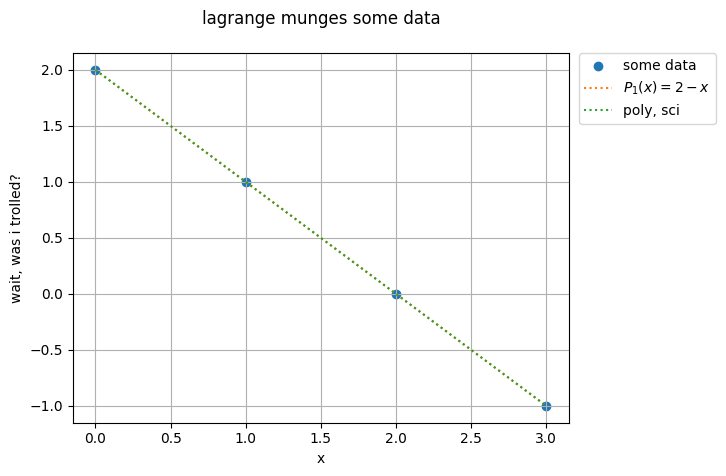


as object:
           3
2.776e-17 x - 1 x + 2

as array of coeffs:
[ 2.00000000e+00 -1.00000000e+00  0.00000000e+00  2.77555756e-17]


In [ ]:
eg_02()

## 2 newtons divided difference

newtons divided difference gives a simple way to achieve the interpolating polynomial. given $n$ data points, its result will be a polynomial of degree $d=n-1$. bc of theorem 02, it is the same polynomial achieved by lagrange.

<b><font color=grey>definition 03</font></b>

denote by $f[x_1 \dots x_n]$ the coefficient of the $x^{n-1}$ term in the unique polynomial that interpolates $(x_1,(f(x_1)),\dots,(x_n,f(x_n))$.

continuing example 01,

\begin{align}
  \begin{array}{l}
    f(0) = 1 \\
    f(2) = 2 \\
    f(3) = 4
  \end{array}
  \quad\xrightarrow{\text{by uniqueness}}\quad
  \frac{1}{2} = f[0\text{ }3\text{ }2] = f[3\text{ }0\text{ }2] = \dots \quad\text{usw.}
\end{align}

<b>newtons divided difference formula</b>

$$
\left.
  \begin{align}
  y = P(x) = N(x) &= f[x_1] \\
  &\quad + f[x_1\textrm{ } x_2]\cdot(x-x_1) \\
  &\quad + f[x_1\textrm{ } x_2\textrm{ } x_3]\cdot(x-x_1)(x-x_2) \\
  &\quad + f[x_1\textrm{ } x_2\textrm{ } x_3\textrm{ } x_4]\cdot(x-x_1)(x-x_2)(x-x_3) \\
  &\quad + \cdots \\
  &\quad + f[x_1\textrm{ } \dots\textrm{ } x_n]\cdot(x-x_1)\textrm{ }\cdots\textrm{ }(x-x_{n-1})
  \end{align} \quad
\right\}\quad\text{unique interpolating polynomial}
$$

$$
\left.
  \begin{align}
  f[x_k] &= f(x_k) = y_k \\
  f[x_k\textrm{ } x_{k+1}] &= \frac{f[x_{k+1}] - f[x_k]}{x_{k+1}-x_k} \\
  f[x_k\textrm{ } x_{k+1}\textrm{ } x_{k+2}] &= \frac{f[x_{k+1}\textrm{ } x_{k+2}] - f[x_k\textrm{ } x_{k+1}]}{x_{k+2}-x_k} \\
  f[x_k\textrm{ } x_{k+1}\textrm{ } x_{k+2}\textrm{ } x_{k+3}] &= \frac{f[x_{k+1}\textrm{ } x_{k+2}\textrm{ } x_{k+3}] - f[x_k\textrm{ } x_{k+1}\textrm{ } x_{k+2}]}{x_{k+3}-x_k} \\ \\
  &\cdots
  \end{align} \quad
\right\}\quad\text{its coefficients}
$$

###### algorithm <b>newtons divided differences</b>

given $x=[x_1,\dots,x_n],y=[y_1,\dots,y_n]$.

```
for j = 1,...,n
  f[x(j)] = y(j)
end

for i = 2,...,n
  for j = 1,...,n+1-i
    f[x(j),...,x(j+i-1)] = (f[x(j+1) ... x(j+i-1)] - f[x(j) ... x(j+i-2)])/(x(j+i-1)-x(j))
  end
end
```

$$
\Rightarrow
P(x) = \sum_{i=1}^n f[x_1\text{ }\dots\text{ }x_i](x-x_1)\dots(x-x_{i-1})
$$

\begin{align}
x_1 \mapsto f[x_1] \\
&& f[x_1\text{ }x_2] \\
x_2 \mapsto f[x_2] &&&& f[x_1\text{ }x_2\text{ }x_3] \\
&& f[x_2\text{ }x_3] \\
x_3 \mapsto f[x_3] \\
\end{align}

where top edge terms of triangle are the coefficients, surprise.

##### example 03

continuing example 01,

\begin{align}
0 \mapsto f(0) = f[x_1] = 1 \\
&& f[x_1\text{ }x_2] = \frac{2-1}{2-0} = \frac{1}{2} \\
2 \mapsto f(2) = f[x_2] = 2 &&&& f[x_1\text{ }x_2\text{ }x_3] = \frac{2-\frac{1}{2}}{3-0} = \frac{1}{2}. \\
&& f[x_2\text{ }x_3] = \frac{4-2}{3-2} = 2 \\
3 \mapsto f(3) =  f[x_3] = 4 \\
\end{align}

$P(x) = 1 + \frac{1}{2}\cdot(x-0) + \frac{1}{2}\cdot(x-0)(x-2) = \frac{1}{2}x^2 - \frac{1}{2}x + 1. \checkmark$

##### example 04

add fourth data point $(1,0)$ to previous example.

\begin{align}
0 \mapsto 1 \\
&& \frac{2-1}{2-0} = \frac{1}{2} \\
2 \mapsto 2 &&&& \frac{2-\frac{1}{2}}{3-0} = \frac{1}{2} \\
&& \frac{4-2}{3-2} = 2 &&&& \frac{0-\frac{1}{2}}{1-0} = -\frac{1}{2} \\
3 \mapsto 4 &&&& \frac{2-2}{1-2} = 0 \\
&& \frac{0-4}{1-3} = 2 \\
1 \mapsto 0 \\
\end{align}

\begin{align}
  P_3(x) &= 1 + \frac{1}{2}\cdot(x-0) + \frac{1}{2}\cdot(x-0)(x-2) - \frac{1}{2}\cdot(x-0)(x-2)(x-3) \\
  &= P_2(x) - \frac{1}{2}\cdot(x-0)(x-2)(x-3).
\end{align}

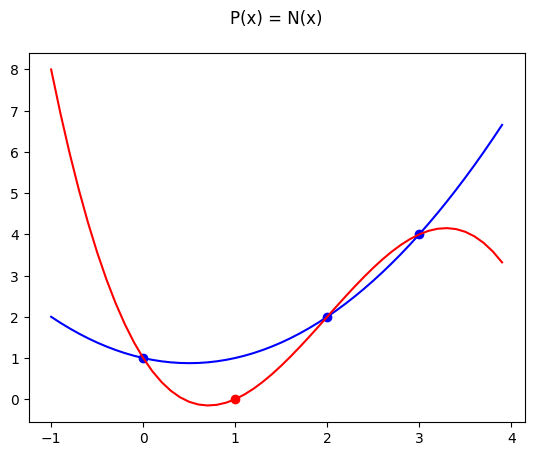

In [ ]:
eg_04()

##### example 05

apply newtons divided difference to example 02.

$(0,2),(1,1),(2,0),(3,-1)$

\begin{array}{l r}
  0 &\mapsto & 2 \\
  &&&& -1 \\
  1 &\mapsto & 1 &&&& 0 \\
  &&&& -1 &&&& 0 \\
  2 &\mapsto & 0 &&&& 0 \\
  &&&& -1 \\
  3 &\mapsto &-1 \\
\end{array}

$\Rightarrow P(x) = 2 + (-1)(x-0) = 2-x. \checkmark$

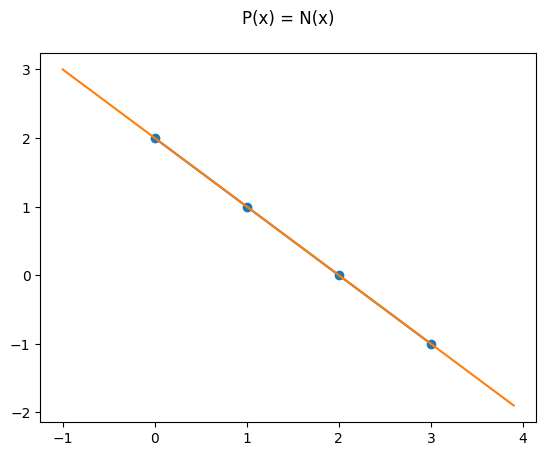

In [ ]:
eg_05()

## 3 how many degree $d$ polynomials pass through $n$ points?

theorem 02 states can be only one polynomial of degree $d\le n-1$ that passes through $n$ points. how many of degree $n$?

adding another points adds another degree but thats cheating? the new polynomial still interpolates the original $n$ points and now it has degree of at least $n$. however, that extra point can be added in as many ways as there are numbers to add.

$$P_n(x) = P_{n-1}(x) + cx(x-x_1)(x-x_2)...(x-x_n), \quad c\ne 0.$$

so how many polynomials of degree $n$ can interpolate $n$ data points? :D

##### example 06

how many polynomials of each degree $0\le d\le 5$ pass through points $(-1,-5),(0,-1),(2-1),(3,11)$?

\begin{array}{r}
  -1\enspace \mapsto &-5 \\
  &&& 4 \\
  0\enspace \mapsto &-1 &&&& -1 \\
  &&& 1 &&&& 1 \\
  2\enspace \mapsto &1 &&&& 3 \\
  &&& 10 \\
  3\enspace \mapsto &11 \\ \\
  \Downarrow\enspace &
\end{array}

\begin{align}
  P_3(x) &= -5 + 4(x+1) - 1(x+1)(x-0) + 1(x+1)(x-0)(x-2) \\
  &= x^3 - 2x^2 + x - 1 \sim \text{only polynomial of degree } d\le n-1 = 4-1 = 3. \\ \\
  P_4(x) &= P_3(x) + c_1x(x+1)(x-0)(x-2)(x-3), \quad c_1\ne0 \sim \infty\text{-ly many}. \\ \\
  P_5(x) &= P_3(x) + c_2x^2(x+1)(x-0)(x-2)(x-3), \quad c_2\ne0 \sim \infty\text{-ly many}. \\
\end{align}

## 4 compression

what does interpolation compress? the degree $n-1$ polynomial characterized by $n$ coefficients is a "compressed" version of $f(x)$. eg, "$sin\text{ }x$" is stored computationally as coefficients and its calculation relies on interpolation. this type of compression is "lossy compression" bc error will occur as sine is not a polynomial.

## 5 representing functions by approximating polynomials

a major use of polynomial interpolation  is to replace evaluation of a complicated function by evaluation of a polynomial - which involves only elementary operations. consider this simplification as a form of compression.

##### example 07

interpolate $f(x) = sin\text{ }x$ at four equally spaced points on $[0,\frac{\pi}{2}]$.

\begin{align}
  0 \mapsto 0.0000 \\
  && 0.9549 \\
  \frac{\pi}{6} \mapsto 0.5000 &&&& -0.2443 \\
  && 0.6990 &&&& -0.1139\\
  \frac{\pi}{3} \mapsto 0.8660 &&&& -0.4232 \\
  && 0.2559 \\
  \frac{\pi}{2} \mapsto 1.0000 \\
\end{align}

\begin{align}
  \Rightarrow P_3(x) &= 0 + 0.9549x - 0.2443x(x-\frac{\pi}{6}) - 0.1139x(x-\frac{\pi}{6})(x-\frac{\pi}{3}) \\
  &= 0 + x(0.9549 + (x-\frac{\pi}{6})(-0.2443 + (x-\frac{\pi}{3})(-0.1139))).
\end{align}

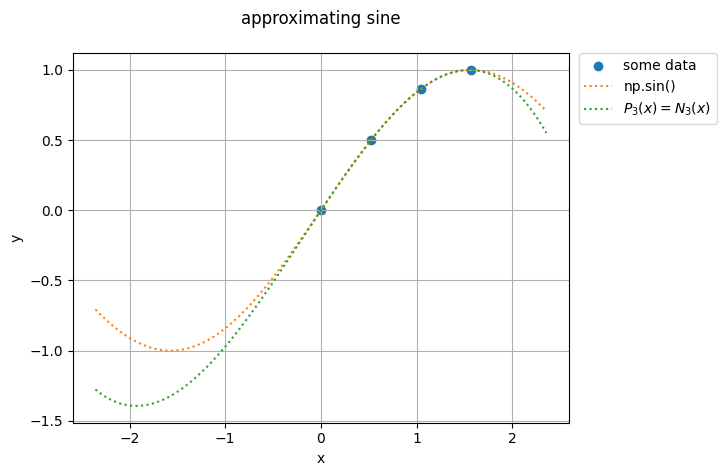


|   x (rad) |   np.sin() |   $N_3,mod$ |       error |
|-----------|------------|-------------|-------------|
|         1 |   0.841471 |    0.841076 | 0.000394766 |
|         2 |   0.909297 |    0.910169 | 0.000871189 |
|         3 |   0.14112  |    0.142842 | 0.0017216   |
|         4 |  -0.756802 |   -0.755661 | 0.0011416   |
|        14 |   0.990607 |    0.992824 | 0.00221669  |
|      1000 |   0.82688  |    0.826294 | 0.000585579 | 



In [ ]:
eg_07()